In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [27]:
data = {}

for filename in os.listdir("./dataset/covid"):
    if filename.endswith(".csv"):
        data[re.search(r"([A-Za-z]*)",filename).group(0)] = pd.read_csv(os.path.join("./dataset/covid",filename))

In [2]:
case_data = pd.read_csv("./dataset/covid/Case.csv")

case_data.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


In [29]:
top_10_provinces = case_data.groupby("province")["confirmed"].sum().sort_values(ascending=False).head(10).sort_values(ascending=True)

pd.Series(top_10_provinces.index,top_10_provinces.values,name="top 10 provinces")

62             Gangwon-do
131               Daejeon
132      Gyeongsangnam-do
156                 Busan
158     Chungcheongnam-do
202               Incheon
1000          Gyeonggi-do
1280                Seoul
1324     Gyeongsangbuk-do
6680                Daegu
Name: top 10 provinces, dtype: object

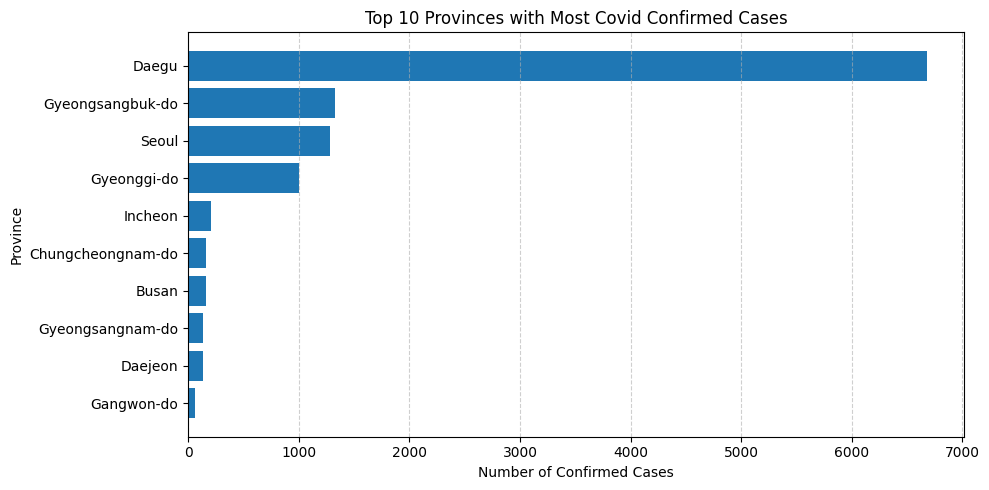

In [25]:
# 1. Sort data by confirmed cases (descending) and select the top 10 provinces


# 2. Create the plot with a pastel color palette
plt.figure(figsize=(10, 5))
plt.title("Top 10 Provinces with Most Covid Confirmed Cases")
plt.barh(top_10_provinces.index, top_10_provinces.values)

# 3. Customize labels and add gridlines for better readability
plt.xlabel("Number of Confirmed Cases")
plt.ylabel("Province")

plt.grid(axis='x', linestyle='--', alpha=0.6)

# 4. Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [48]:
time = pd.read_csv("./dataset/covid/Time.csv")

time['date'] = pd.to_datetime(time['date'])

time['month'] = time['date'].dt.month


In [53]:
time.head()

,date,time,test,negative,confirmed,released,deceased,month
0,2020-01-20,16,1,0,1,0,0,1
1,2020-01-21,16,1,0,1,0,0,1
2,2020-01-22,16,4,3,1,0,0,1
3,2020-01-23,16,22,21,1,0,0,1
4,2020-01-24,16,27,25,2,0,0,1


In [57]:
time.groupby('month')[['negative','confirmed','released','deceased']].sum()

,negative,confirmed,released,deceased
month,,,,
1,873,40,0,0
2,349533,12149,317,86
3,7479590,242847,57006,2590
4,15236818,315359,227602,6525
5,22164772,342230,304525,8081
6,32272290,364458,324053,8326


In [88]:
test_result_per_month = time.pivot_table(index='month',values=['negative','confirmed','released','deceased'],aggfunc='sum')
test_result_per_month

,confirmed,deceased,negative,released
month,,,,
1,40,0,873,0
2,12149,86,349533,317
3,242847,2590,7479590,57006
4,315359,6525,15236818,227602
5,342230,8081,22164772,304525
6,364458,8326,32272290,324053


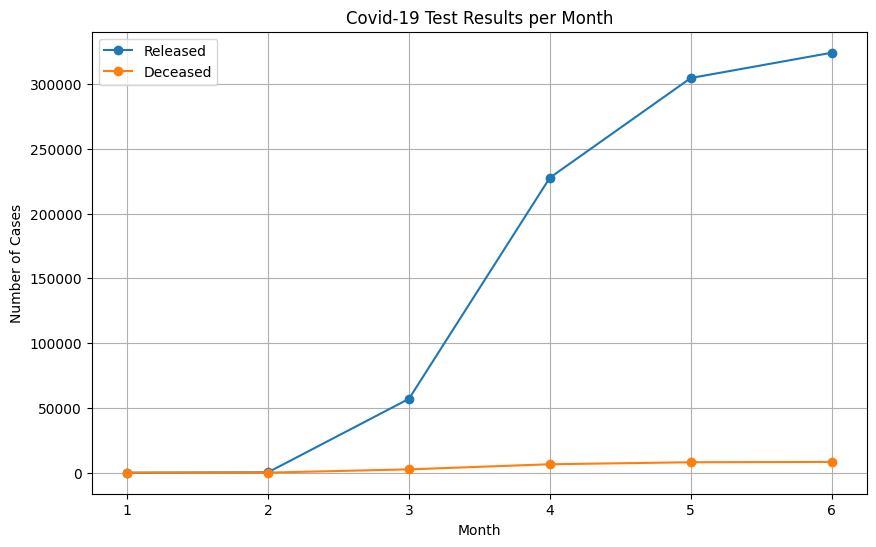

In [97]:
plt.figure(figsize=(10, 6))

# plt.plot(test_result_per_month.index, test_result_per_month['negative'], marker='o', label='Negative')
# plt.plot(test_result_per_month.index, test_result_per_month['confirmed'], marker='o', label='Confirmed')
plt.plot(test_result_per_month.index, test_result_per_month['released'], marker='o', label='Released')
plt.plot(test_result_per_month.index, test_result_per_month['deceased'], marker='o', label='Deceased')

plt.title('Covid-19 Test Results per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.xticks(test_result_per_month.index)
plt.legend()
plt.grid(True)


In [78]:
time['deceased'].describe()

count    163.000000
mean     157.104294
std      114.010916
min        0.000000
25%       17.500000
50%      208.000000
75%      263.500000
max      282.000000
Name: deceased, dtype: float64

In [76]:
mean = [time[i].sum() / time['test'].sum() for i in time.columns.to_list()[3:-1]]

[0.9552094728771913,
 0.01573962287060872,
 0.011258620395988104,
 0.00031561007582948643]